In [37]:
import os
import time
import pandas as pd
import numpy as np
import itertools
import binascii

Importing corpus into dataframe

In [38]:
cwd = os.getcwd()

import glob
all_files = glob.glob(cwd + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

news_frame = pd.concat(li, axis=0, ignore_index=True) #final dataframe

Normalising and tokenizing each document in the corpus

In [39]:
import nltk
from nltk import word_tokenize, sent_tokenize
import re, string, unicodedata
import inflect
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [40]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\s\w]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words



def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    stop_words = stopwords.words('english')
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

def lemmatize_words(words):
    """Lemmatize all words in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemma_list = []
    for word in words:
        lemma1 = lemmatizer.lemmatize(word, pos='n')
        lemma2 = lemmatizer.lemmatize(lemma1, pos='v')
        lemma3 = lemmatizer.lemmatize(lemma2, pos='a')
        lemma_list.append(lemma3)
    return lemma_list

In [41]:
def shingling(shingle_len, lemmas):
    shingles = set()
    for i in range(len(lemmas) - shingle_len + 1):
        shingle = lemmas[i:i+shingle_len] 
        shingle = ' '.join(shingle)
        shingle = shingle.encode("utf-8")
        hash32 = binascii.crc32(shingle)&0xffffffff
        
        if hash32 not in shingles:
            shingles.add(hash32)
    
    return shingles

In [17]:
# """Shingling"""
# import pickle

# total_shingles = 0
# shingles_set = set()
# shingle_matrix = {}

# print("Starting shingling...")

# for i in range(len(news_frame)):

#     """Normalizing text in each doc"""
    
#     article = news_frame.loc[i,"content"]
#     try:
#         words = nltk.word_tokenize(article)
#     except:
#         continue
    
#     words = normalize(words)
#     lemmas = lemmatize_words(words)
# #   sorted_lemmas = sorted(set(lemmas))
#     print("Document tokenized and normalized")
    
    
#     """Shingling unsorted lemmas with 3 words"""
   
#     shingle_len = 3
    
#     shingles_article = shingling(shingle_len, lemmas)
#     shingle_matrix[i] = shingles_article
#     print("Article", i, " shingled!\n")
# #     print(shingles_article, "\n.\n")
    
#     #constructing shingles postings list 
#     shingles_set = shingles_set.union(shingles_article)
#     shingle_count = len(shingles_set)
    
#     total_shingles += shingle_count
#     print(total_shingles, "\n.\n.\n.\n.\n")
    
# with open('char_matrix.pkl', 'wb') as handle:
#     pickle.dump(shingle_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

   

Starting shingling...
Document tokenized and normalized
Article 0  shingled!

499 
.
.
.
.

Document tokenized and normalized
Article 1  shingled!

3581 
.
.
.
.

Document tokenized and normalized
Article 2  shingled!

7980 
.
.
.
.

Document tokenized and normalized
Article 3  shingled!

13589 
.
.
.
.

Document tokenized and normalized
Article 4  shingled!

19620 
.
.
.
.

Document tokenized and normalized
Article 5  shingled!

25737 
.
.
.
.

Document tokenized and normalized
Article 6  shingled!

32197 
.
.
.
.

Document tokenized and normalized
Article 7  shingled!

40315 
.
.
.
.

Document tokenized and normalized
Article 8  shingled!

49303 
.
.
.
.

Document tokenized and normalized
Article 9  shingled!

58720 
.
.
.
.

Document tokenized and normalized
Article 10  shingled!

68782 
.
.
.
.

Document tokenized and normalized
Article 11  shingled!

79875 
.
.
.
.

Document tokenized and normalized
Article 12  shingled!

91732 
.
.
.
.

Document tokenized and normalized
Article 1

Document tokenized and normalized
Article 110  shingled!

4368316 
.
.
.
.

Document tokenized and normalized
Article 111  shingled!

4442735 
.
.
.
.

Document tokenized and normalized
Article 112  shingled!

4517414 
.
.
.
.

Document tokenized and normalized
Article 113  shingled!

4592819 
.
.
.
.

Document tokenized and normalized
Article 114  shingled!

4668512 
.
.
.
.

Document tokenized and normalized
Article 115  shingled!

4744484 
.
.
.
.

Document tokenized and normalized
Article 116  shingled!

4820858 
.
.
.
.

Document tokenized and normalized
Article 117  shingled!

4897693 
.
.
.
.

Document tokenized and normalized
Article 118  shingled!

4974971 
.
.
.
.

Document tokenized and normalized
Article 119  shingled!

5052866 
.
.
.
.

Document tokenized and normalized
Article 120  shingled!

5131845 
.
.
.
.

Document tokenized and normalized
Article 121  shingled!

5211334 
.
.
.
.

Document tokenized and normalized
Article 122  shingled!

5291205 
.
.
.
.

Document tok

KeyboardInterrupt: 

In [42]:
# import pickle
# # Dumping

# with open('char_matrix.pkl', 'wb') as handle:
#     pickle.dump(shingle_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('shingles_set.pkl', 'wb') as handle:
#     pickle.dump(shingles_set, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

# Loading files
    
with open('char_matrix.pkl', 'rb') as handle:
    shingle_matrix = pickle.load(handle)

with open('shingles_set.pkl', 'rb') as handle:
    shingles_set = pickle.load(handle)

total_shingles = len(shingles_set)
print(total_shingles)

4604006


In [43]:
import random

def PrimalityTest(number):
    '''
    because the algorithm input is ODD number than if we get
    even and it is the number 2 we return TRUE ( spcial case )
    if we get the number 1 we return false and any other even
    number we will return false.
    '''
    if number == 2:
        return True
    elif number == 1 or number % 2 == 0:
        return False

    ''' first we want to express n as : 2^s * r ( were r is odd ) '''

    ''' the odd part of the number '''
    oddPartOfNumber = number - 1

    ''' The number of time that the number is divided by two '''
    timesTwoDividNumber = 0

    ''' while r is even divid by 2 to find the odd part '''
    while oddPartOfNumber % 2 == 0:
        oddPartOfNumber = oddPartOfNumber // 2
        timesTwoDividNumber = timesTwoDividNumber + 1

    '''
    since there are number that are cases of "strong liar" we
    need to check more then one number
    '''
    for time in range(3):

        ''' choose "Good" random number '''
        while True:
            ''' Draw a RANDOM number in range of number ( Z_number )  '''
            randomNumber = random.randint(2, number) - 1
            if randomNumber != 0 and randomNumber != 1:
                break

        ''' randomNumberWithPower = randomNumber^oddPartOfNumber mod number '''
        randomNumberWithPower = pow(randomNumber, oddPartOfNumber, number)

        ''' if random number is not 1 and not -1 ( in mod n ) '''
        if (randomNumberWithPower != 1) and (randomNumberWithPower != number - 1):
            # number of iteration
            iterationNumber = 1

            ''' while we can squre the number and the squered number is not -1 mod number'''
            while (iterationNumber <= timesTwoDividNumber - 1) and (randomNumberWithPower != number - 1):
                ''' squre the number '''
                randomNumberWithPower = pow(randomNumberWithPower, 2, number)

                # inc the number of iteration
                iterationNumber = iterationNumber + 1
            '''
            if x != -1 mod number then it because we did not found strong witnesses
            hence 1 have more then two roots in mod n ==>
            n is composite ==> return false for primality
            '''
            if (randomNumberWithPower != (number - 1)):
                return False

    ''' well the number pass the tests ==> it is probably prime ==> return true for primality '''
    return True


In [44]:
i = 1
# find first prime which is higher than the total number of shingles

while not PrimalityTest(total_shingles + i):
    i += 1
print('Next prime = ', total_shingles + i)

maxShingleID = total_shingles
nextPrime = total_shingles + i

Next prime =  4604063


In [45]:
# Our random hash function will take the form of:
#   h(x) = (a*x + b) % c
# Where 'x' is the input value, 'a' and 'b' are random coefficients, and 'c' is
# a prime number just greater than shingleNo.

def pickRandomCoeffs(k):
    # Create a list of 'k' random values.
    randList = []

    while k > 0:
        # Get a random shingle ID.
        randIndex = random.randint(0, maxShingleID)

        # Ensure that each random number is unique.
        while randIndex in randList:
            randIndex = random.randint(0, maxShingleID)

            # Add the random number to the list.
        randList.append(randIndex)
        k = k - 1

    return randList

numHashes = 128
# For each of the 'numHashes' hash functions, generate a different coefficient 'a' and 'b'.
coeffA = pickRandomCoeffs(numHashes)
coeffB = pickRandomCoeffs(numHashes)


In [24]:
"""Minhashing"""

# signatures = {}

# for i in shingle_matrix:
#     shingle_set = shingle_matrix[i]
#     signature = []
#     print("Article ", i)
    
#     for j in range(0, numHashes):
#         minHashCode = nextPrime + 1

#         # For each shingle in the document...
#         for shingleID in shingle_set:
#             # Evaluate the hash function.
#             a = coeffA[j]*shingleID
#             hashCode = (a+coeffB[j]) % nextPrime

#             # Track the lowest hash code seen.
#             if hashCode < minHashCode:
#                 minHashCode = hashCode

#         # Add the smallest hash code value as component number 'i' of the signature.
#         signature.append(minHashCode)

#     # Store the MinHash signature for this document.
#     signatures[i] = signature

# total_docs = len(signatures)
# print("\nToal docs: ", total_docs)

Article  0
Article  1
Article  2
Article  3
Article  4
Article  5
Article  6
Article  7
Article  8
Article  9
Article  10
Article  11
Article  12
Article  13
Article  14
Article  15
Article  16
Article  17
Article  18
Article  19
Article  20
Article  21
Article  22
Article  23
Article  24
Article  25
Article  26
Article  27
Article  28
Article  29
Article  30
Article  31
Article  32
Article  33
Article  34
Article  35
Article  36
Article  37
Article  38
Article  39
Article  40
Article  41
Article  42
Article  43
Article  44
Article  45
Article  46
Article  47
Article  48
Article  49
Article  50
Article  51
Article  52
Article  53
Article  54
Article  55
Article  56
Article  57
Article  58
Article  59
Article  60
Article  61
Article  62
Article  63
Article  64
Article  65
Article  66
Article  67
Article  68
Article  69
Article  70
Article  71
Article  72
Article  73
Article  74
Article  75
Article  76
Article  77
Article  78
Article  79
Article  80
Article  81
Article  82
Article  83
Ar

In [46]:
#Dumping
# with open('sign_matrix.pkl', 'wb') as handle:
#     pickle.dump(signatures, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    
# Loading
with open('sign_matrix.pkl', 'rb') as handle:
    signatures = pickle.load(handle)

In [47]:
"""LSH"""

band_size = 8

def get_hashes_of_bands(band_size, signature):
    """Returns band-wise hash value of each signature"""    
    hashes_of_bands = []
    
    for i in range(len(signature)):
        if i%band_size == 0:
            if i > 0:
                hashes_of_bands.append(hash_of_band)
            hash_of_band = 0
        hash_of_band += hash(signature[i])
        
    return hashes_of_bands

similar_docs = set()
similarity_dict = {}

"""To get similar docs"""

doc_no = 0
for doc_no in signatures:
    band_wise_hash = get_hashes_of_bands(band_size, signatures[doc_no])
    
    for i in range(len(band_wise_hash)):
        
        if i not in similarity_dict:
            similarity_dict[i] = {}
        
        if band_wise_hash[i] not in similarity_dict[i]:
            similarity_dict[i][band_wise_hash[i]] = [doc_no]
        
        else:
            similarity_dict[i][band_wise_hash[i]].append(doc_no)
            
for band in similarity_dict:
    for hash_val in similarity_dict[band]:
        if len(similarity_dict[band][hash_val]) >= 2:
            for sim_pair in itertools.combinations(similarity_dict[band][hash_val], r=2):
                similar_docs.add(sim_pair)
                
print(similar_docs)

{(211, 3634), (6798, 6801), (7281, 9405), (4265, 4648), (1796, 5147), (6860, 8082), (5250, 7469), (6099, 10454), (9771, 9902), (4008, 4593), (5089, 6880), (4068, 6207), (4791, 6439), (1711, 2609), (4616, 5412), (4755, 9205), (1534, 2906), (7727, 8077), (4702, 8890), (5718, 10033), (6193, 8171), (1698, 10580), (5050, 5065), (3458, 4193), (7016, 8042), (8251, 8871), (4898, 8162), (785, 2906), (621, 9129), (1421, 3818), (606, 742), (3735, 4164), (211, 6101), (6417, 8776), (3666, 7885), (4042, 9637), (5050, 6292), (858, 2906), (5395, 6512), (3936, 9582), (3477, 3735), (3909, 4967), (2600, 3936), (5850, 7513), (4653, 9925), (7883, 8893), (74, 149), (9909, 9989), (7047, 7089), (99, 720), (3186, 6495), (3081, 3256), (785, 2609), (7823, 8538), (1106, 7498), (569, 1130), (4177, 9999), (1383, 4558), (6831, 6861), (1458, 4438), (9756, 10123), (4413, 9811), (1843, 9648), (5489, 9067), (359, 2130), (6986, 7001), (1406, 2512), (3182, 3893), (5870, 8686), (8144, 8499), (6859, 6864), (6512, 7334), (44

In [48]:
def get_jaccard_sim(article1, article2):
    """Getting Jaccard similarity"""
    return len(article1.intersection(article2))/len(article1.union(article2))

In [53]:
from scipy import spatial

def get_cosine_similarity(dataSetI, dataSetII):
    """Fetching cosine similarity"""
    result = 1 - spatial.distance.cosine(dataSetI, dataSetII)
    return result

In [54]:
for i in similar_docs:
#     print(shingle_matrix[i[0]])
#     print(shingle_matrix[i[1]])
    try:
        j = get_jaccard_sim(shingle_matrix[i[0]], shingle_matrix[i[1]])
        c = get_cosine_similarity(signatures[i[0]], signatures[i[1]])
        print("Jaccard sim of ", i, ": ", j)
        print("Cosine sim of ", i, ": ", c)
    except:
        continue
#     print(1, ".", news_frame.loc[i[0], "content"], "\n...\n...\n")
#     print(2, ".", news_frame.loc[i[1], "content"], "\n...\n...\n")
    print(".\n.\n.\n.\n")

Jaccard sim of  (211, 3634) :  0.0
Cosine sim of  (211, 3634) :  0.40761483370559737
.
.
.
.

Jaccard sim of  (6798, 6801) :  0.7109783420463032
Cosine sim of  (6798, 6801) :  0.8175050950713512
.
.
.
.

Jaccard sim of  (7281, 9405) :  0.0
Cosine sim of  (7281, 9405) :  0.5458697460107138
.
.
.
.

Jaccard sim of  (4265, 4648) :  0.9393220934316825
Cosine sim of  (4265, 4648) :  0.9974036680783526
.
.
.
.

Jaccard sim of  (1796, 5147) :  0.0
Cosine sim of  (1796, 5147) :  0.5099561656588383
.
.
.
.

Jaccard sim of  (6860, 8082) :  0.7368421052631579
Cosine sim of  (6860, 8082) :  0.8879127833988196
.
.
.
.

Jaccard sim of  (5250, 7469) :  0.0033444816053511705
Cosine sim of  (5250, 7469) :  0.4909315310847959
.
.
.
.

Jaccard sim of  (6099, 10454) :  0.0
Cosine sim of  (6099, 10454) :  0.5426542079607347
.
.
.
.

Jaccard sim of  (9771, 9902) :  0.0
Cosine sim of  (9771, 9902) :  0.567432756334967
.
.
.
.

Jaccard sim of  (4008, 4593) :  0.0
Cosine sim of  (4008, 4593) :  0.5370537848398

Cosine sim of  (5200, 9140) :  0.47443050192016967
.
.
.
.

Jaccard sim of  (4525, 4926) :  0.0
Cosine sim of  (4525, 4926) :  0.48536752212101497
.
.
.
.

Jaccard sim of  (8205, 8820) :  0.013397129186602871
Cosine sim of  (8205, 8820) :  0.48971331490386816
.
.
.
.

Jaccard sim of  (3497, 8979) :  0.0
Cosine sim of  (3497, 8979) :  0.5063846964634448
.
.
.
.

Jaccard sim of  (5704, 9339) :  0.0
Cosine sim of  (5704, 9339) :  0.5081549428055424
.
.
.
.

Jaccard sim of  (142, 567) :  0.0
Cosine sim of  (142, 567) :  0.4898295130440189
.
.
.
.

Jaccard sim of  (4110, 4279) :  0.0
Cosine sim of  (4110, 4279) :  0.5056223200434095
.
.
.
.

Jaccard sim of  (6887, 6889) :  0.8273504273504273
Cosine sim of  (6887, 6889) :  0.9170134022304605
.
.
.
.

Jaccard sim of  (3494, 5742) :  0.0
Cosine sim of  (3494, 5742) :  0.5041085803250839
.
.
.
.

Jaccard sim of  (5927, 8815) :  0.0
Cosine sim of  (5927, 8815) :  0.5481847213780271
.
.
.
.

Jaccard sim of  (4862, 9230) :  0.0
Cosine sim of  (486

Jaccard sim of  (5060, 8038) :  0.0
Cosine sim of  (5060, 8038) :  0.4171530482647763
.
.
.
.

Jaccard sim of  (3585, 4887) :  0.0
Cosine sim of  (3585, 4887) :  0.495184957790505
.
.
.
.

Jaccard sim of  (2866, 4655) :  0.0
Cosine sim of  (2866, 4655) :  0.42911598502511483
.
.
.
.

Jaccard sim of  (5389, 8207) :  0.0
Cosine sim of  (5389, 8207) :  0.5246419914709444
.
.
.
.

Jaccard sim of  (484, 5777) :  0.0
Cosine sim of  (484, 5777) :  0.47013819904166443
.
.
.
.

Jaccard sim of  (9181, 10090) :  0.0
Cosine sim of  (9181, 10090) :  0.5282776571010744
.
.
.
.

Jaccard sim of  (7934, 10441) :  0.0
Cosine sim of  (7934, 10441) :  0.525822658902183
.
.
.
.

Jaccard sim of  (4978, 7674) :  0.0
Cosine sim of  (4978, 7674) :  0.49055017348533825
.
.
.
.

Jaccard sim of  (3225, 4743) :  0.0
Cosine sim of  (3225, 4743) :  0.4846187887474629
.
.
.
.

Jaccard sim of  (3327, 10033) :  0.0
Cosine sim of  (3327, 10033) :  0.5219331817322006
.
.
.
.

Jaccard sim of  (1090, 1558) :  0.0
Cosine si

Jaccard sim of  (4829, 4863) :  0.0
Cosine sim of  (4829, 4863) :  0.538312317589226
.
.
.
.

Jaccard sim of  (5301, 9665) :  0.0
Cosine sim of  (5301, 9665) :  0.5266670489636943
.
.
.
.

Jaccard sim of  (1296, 4866) :  0.0
Cosine sim of  (1296, 4866) :  0.5202982562651559
.
.
.
.

Jaccard sim of  (8579, 8895) :  1.0
Cosine sim of  (8579, 8895) :  1.0
.
.
.
.

Jaccard sim of  (6758, 9890) :  0.0
Cosine sim of  (6758, 9890) :  0.4740736469647546
.
.
.
.

Jaccard sim of  (6829, 9000) :  0.008428657435279952
Cosine sim of  (6829, 9000) :  0.48475435105451015
.
.
.
.

Jaccard sim of  (459, 8014) :  0.0
Cosine sim of  (459, 8014) :  0.5543247741669365
.
.
.
.

Jaccard sim of  (2294, 3071) :  0.0
Cosine sim of  (2294, 3071) :  0.5280801317441939
.
.
.
.

Jaccard sim of  (5885, 6384) :  1.0
Cosine sim of  (5885, 6384) :  1.0
.
.
.
.

Jaccard sim of  (3871, 10186) :  0.0
Cosine sim of  (3871, 10186) :  0.5955718921858392
.
.
.
.

Jaccard sim of  (6257, 9989) :  0.0
Cosine sim of  (6257, 9989)

Jaccard sim of  (7022, 7027) :  0.859542530378842
Cosine sim of  (7022, 7027) :  0.9519881340535514
.
.
.
.

Jaccard sim of  (102, 3338) :  0.0
Cosine sim of  (102, 3338) :  0.4843344709822466
.
.
.
.

Jaccard sim of  (1453, 5765) :  0.0
Cosine sim of  (1453, 5765) :  0.4939063018314982
.
.
.
.

Jaccard sim of  (3337, 7991) :  0.0
Cosine sim of  (3337, 7991) :  0.5487063562798384
.
.
.
.

Jaccard sim of  (4405, 4734) :  0.9206864168018442
Cosine sim of  (4405, 4734) :  0.9969437463978682
.
.
.
.

Jaccard sim of  (3107, 8262) :  0.0
Cosine sim of  (3107, 8262) :  0.4826896265982703
.
.
.
.

Jaccard sim of  (3309, 8702) :  0.0
Cosine sim of  (3309, 8702) :  0.5047155493311352
.
.
.
.

Jaccard sim of  (6798, 6806) :  0.8864097363083164
Cosine sim of  (6798, 6806) :  0.8914469576319066
.
.
.
.

Jaccard sim of  (5552, 8689) :  0.0
Cosine sim of  (5552, 8689) :  0.49612172798662213
.
.
.
.

Jaccard sim of  (5395, 5471) :  1.0
Cosine sim of  (5395, 5471) :  1.0
.
.
.
.

Jaccard sim of  (5704,

Jaccard sim of  (6891, 8430) :  0.0015337423312883436
Cosine sim of  (6891, 8430) :  0.5155448965853564
.
.
.
.

Jaccard sim of  (5374, 10078) :  0.0
Cosine sim of  (5374, 10078) :  0.5744507826088611
.
.
.
.

Jaccard sim of  (5055, 9492) :  0.0
Cosine sim of  (5055, 9492) :  0.4375340641265182
.
.
.
.

Jaccard sim of  (813, 2132) :  0.0
Cosine sim of  (813, 2132) :  0.47115258830654394
.
.
.
.

Jaccard sim of  (3523, 3793) :  0.8453873712494402
Cosine sim of  (3523, 3793) :  0.8886789345243065
.
.
.
.

Jaccard sim of  (7062, 7071) :  0.8178670360110804
Cosine sim of  (7062, 7071) :  0.8618887778319918
.
.
.
.

Jaccard sim of  (5597, 8208) :  0.0
Cosine sim of  (5597, 8208) :  0.46824677811446314
.
.
.
.

Jaccard sim of  (4464, 6439) :  0.0
Cosine sim of  (4464, 6439) :  0.5049865325648305
.
.
.
.

Jaccard sim of  (8581, 8809) :  0.013779527559055118
Cosine sim of  (8581, 8809) :  0.5095502760660824
.
.
.
.

Jaccard sim of  (5843, 9225) :  0.0005252100840336134
Cosine sim of  (5843, 92

Jaccard sim of  (4405, 4821) :  0.8544146825396826
Cosine sim of  (4405, 4821) :  0.9378225182949564
.
.
.
.

Jaccard sim of  (1213, 8232) :  0.0
Cosine sim of  (1213, 8232) :  0.5617341382708049
.
.
.
.

Jaccard sim of  (4341, 9659) :  0.0
Cosine sim of  (4341, 9659) :  0.5103542885034689
.
.
.
.

Jaccard sim of  (3355, 8475) :  0.001564945226917058
Cosine sim of  (3355, 8475) :  0.4810913692556045
.
.
.
.

Jaccard sim of  (812, 1082) :  1.0
Cosine sim of  (812, 1082) :  1.0
.
.
.
.

Jaccard sim of  (3533, 7939) :  0.0
Cosine sim of  (3533, 7939) :  0.5424006326544543
.
.
.
.

Jaccard sim of  (7392, 9717) :  0.0
Cosine sim of  (7392, 9717) :  0.5481482774556823
.
.
.
.

Jaccard sim of  (6885, 6898) :  0.8400659521846661
Cosine sim of  (6885, 6898) :  0.9609596052074599
.
.
.
.

Jaccard sim of  (7960, 10119) :  0.0
Cosine sim of  (7960, 10119) :  0.5859341210371255
.
.
.
.

Jaccard sim of  (4483, 7958) :  0.0
Cosine sim of  (4483, 7958) :  0.5214300195817411
.
.
.
.

Jaccard sim of  (7

Cosine sim of  (5541, 7968) :  0.47926216051505954
.
.
.
.

Jaccard sim of  (5752, 9644) :  0.0
Cosine sim of  (5752, 9644) :  0.4870204718672487
.
.
.
.

Jaccard sim of  (7334, 7436) :  1.0
Cosine sim of  (7334, 7436) :  1.0
.
.
.
.

Jaccard sim of  (2152, 7068) :  0.0
Cosine sim of  (2152, 7068) :  0.5224457016585404
.
.
.
.

Jaccard sim of  (31, 1653) :  0.0
Cosine sim of  (31, 1653) :  0.34507742776515204
.
.
.
.

Jaccard sim of  (35, 484) :  0.0
Cosine sim of  (35, 484) :  0.5452932082994457
.
.
.
.

Jaccard sim of  (7258, 8175) :  0.0
Cosine sim of  (7258, 8175) :  0.491007509377146
.
.
.
.

Jaccard sim of  (5935, 7192) :  1.0
Cosine sim of  (5935, 7192) :  1.0
.
.
.
.

Jaccard sim of  (3759, 5079) :  0.0
Cosine sim of  (3759, 5079) :  0.4894759674895015
.
.
.
.

Jaccard sim of  (5165, 7085) :  0.0
Cosine sim of  (5165, 7085) :  0.4563519967148688
.
.
.
.

Jaccard sim of  (4980, 10389) :  0.0
Cosine sim of  (4980, 10389) :  0.4954575570809441
.
.
.
.

Jaccard sim of  (3394, 4168)

Jaccard sim of  (3793, 5046) :  0.6489738145789101
Cosine sim of  (3793, 5046) :  0.8565839071014836
.
.
.
.

Jaccard sim of  (5278, 6512) :  1.0
Cosine sim of  (5278, 6512) :  1.0
.
.
.
.

Jaccard sim of  (6973, 7449) :  0.0
Cosine sim of  (6973, 7449) :  0.5321303465871413
.
.
.
.

Jaccard sim of  (6384, 7192) :  1.0
Cosine sim of  (6384, 7192) :  1.0
.
.
.
.

Jaccard sim of  (4611, 9947) :  0.0
Cosine sim of  (4611, 9947) :  0.48762078678302023
.
.
.
.

Jaccard sim of  (4490, 7881) :  0.0005277044854881266
Cosine sim of  (4490, 7881) :  0.4412802811449841
.
.
.
.

Jaccard sim of  (3675, 6746) :  0.0
Cosine sim of  (3675, 6746) :  0.41860170952371667
.
.
.
.

Jaccard sim of  (8161, 9686) :  0.0
Cosine sim of  (8161, 9686) :  0.44605325530288575
.
.
.
.

Jaccard sim of  (8144, 8895) :  1.0
Cosine sim of  (8144, 8895) :  1.0
.
.
.
.

Jaccard sim of  (3523, 3735) :  0.8746669755589019
Cosine sim of  (3523, 3735) :  0.9024361325888293
.
.
.
.

Jaccard sim of  (5200, 7336) :  0.0033444816

Jaccard sim of  (3656, 4821) :  0.6270950862562341
Cosine sim of  (3656, 4821) :  0.8050390284705867
.
.
.
.

Jaccard sim of  (5382, 8704) :  0.0
Cosine sim of  (5382, 8704) :  0.5803685565912742
.
.
.
.

Jaccard sim of  (7033, 7035) :  0.9141795824260279
Cosine sim of  (7033, 7035) :  0.9527166381156147
.
.
.
.

Jaccard sim of  (3973, 5391) :  0.0
Cosine sim of  (3973, 5391) :  0.5535849976713146
.
.
.
.

Jaccard sim of  (6903, 6939) :  0.6778280542986426
Cosine sim of  (6903, 6939) :  0.8213897141941933
.
.
.
.

Jaccard sim of  (212, 6372) :  0.0
Cosine sim of  (212, 6372) :  0.551820100603619
.
.
.
.

Jaccard sim of  (3736, 9013) :  0.0
Cosine sim of  (3736, 9013) :  0.5235236663964741
.
.
.
.

Jaccard sim of  (7773, 10469) :  0.0
Cosine sim of  (7773, 10469) :  0.41663453138252793
.
.
.
.

Jaccard sim of  (4657, 6063) :  0.0
Cosine sim of  (4657, 6063) :  0.4972443091233557
.
.
.
.

Jaccard sim of  (5456, 9676) :  0.0
Cosine sim of  (5456, 9676) :  0.38984236517593907
.
.
.
.

Jacc

Jaccard sim of  (1495, 7474) :  0.0
Cosine sim of  (1495, 7474) :  0.49675774052556765
.
.
.
.

Jaccard sim of  (7375, 8730) :  0.0
Cosine sim of  (7375, 8730) :  0.5179333693192685
.
.
.
.

Jaccard sim of  (7941, 10462) :  0.0
Cosine sim of  (7941, 10462) :  0.546762170520525
.
.
.
.

Jaccard sim of  (6976, 9595) :  0.0
Cosine sim of  (6976, 9595) :  0.4412466380805171
.
.
.
.

Jaccard sim of  (4551, 8463) :  0.0
Cosine sim of  (4551, 8463) :  0.5829882472333437
.
.
.
.

Jaccard sim of  (5395, 7334) :  1.0
Cosine sim of  (5395, 7334) :  1.0
.
.
.
.

Jaccard sim of  (8133, 8656) :  0.012422360248447204
Cosine sim of  (8133, 8656) :  0.5394589809318034
.
.
.
.

Jaccard sim of  (3242, 8618) :  0.0
Cosine sim of  (3242, 8618) :  0.40621514925136804
.
.
.
.

Jaccard sim of  (6754, 6972) :  0.0
Cosine sim of  (6754, 6972) :  0.5173366894956923
.
.
.
.

Jaccard sim of  (4588, 9243) :  0.0
Cosine sim of  (4588, 9243) :  0.5587058861430657
.
.
.
.

Jaccard sim of  (8290, 9888) :  0.0
Cosine si


Jaccard sim of  (3705, 9428) :  0.0
Cosine sim of  (3705, 9428) :  0.5497500916808861
.
.
.
.

Jaccard sim of  (5814, 8614) :  0.0
Cosine sim of  (5814, 8614) :  0.5867484972746125
.
.
.
.

Jaccard sim of  (3163, 3880) :  0.0
Cosine sim of  (3163, 3880) :  0.541802976307983
.
.
.
.

Jaccard sim of  (6837, 9932) :  0.0
Cosine sim of  (6837, 9932) :  0.4391652761535326
.
.
.
.

Jaccard sim of  (6907, 7017) :  0.6519941634241245
Cosine sim of  (6907, 7017) :  0.7664557200426714
.
.
.
.

Jaccard sim of  (6513, 7922) :  0.0
Cosine sim of  (6513, 7922) :  0.4964402965106961
.
.
.
.

Jaccard sim of  (3764, 5178) :  0.0
Cosine sim of  (3764, 5178) :  0.553613453948713
.
.
.
.

Jaccard sim of  (181, 5487) :  0.0
Cosine sim of  (181, 5487) :  0.5965619883869874
.
.
.
.

Jaccard sim of  (3459, 3788) :  0.0
Cosine sim of  (3459, 3788) :  0.4932312239547333
.
.
.
.

Jaccard sim of  (658, 1292) :  0.0
Cosine sim of  (658, 1292) :  0.5026761996304256
.
.
.
.

Jaccard sim of  (3129, 10545) :  0.0
Cos

Cosine sim of  (3781, 6197) :  0.45247907212858307
.
.
.
.

Jaccard sim of  (7776, 8895) :  1.0
Cosine sim of  (7776, 8895) :  1.0
.
.
.
.

Jaccard sim of  (8029, 8195) :  0.8235294117647058
Cosine sim of  (8029, 8195) :  0.9511568114709812
.
.
.
.

Jaccard sim of  (2517, 10416) :  0.0
Cosine sim of  (2517, 10416) :  0.4702551623290948
.
.
.
.

Jaccard sim of  (5781, 10342) :  0.0007347538574577516
Cosine sim of  (5781, 10342) :  0.40503875989244664
.
.
.
.

Jaccard sim of  (5302, 10123) :  0.0
Cosine sim of  (5302, 10123) :  0.45515704765143083
.
.
.
.

Jaccard sim of  (6860, 8579) :  0.7368421052631579
Cosine sim of  (6860, 8579) :  0.8879127833988196
.
.
.
.

Jaccard sim of  (4314, 8152) :  0.010416666666666666
Cosine sim of  (4314, 8152) :  0.4181613267249522
.
.
.
.

Jaccard sim of  (191, 7083) :  0.0
Cosine sim of  (191, 7083) :  0.48198938003854286
.
.
.
.

Jaccard sim of  (4628, 9068) :  0.0
Cosine sim of  (4628, 9068) :  0.5012240371400778
.
.
.
.

Jaccard sim of  (6934, 6935)

Jaccard sim of  (1732, 9332) :  0.0
Cosine sim of  (1732, 9332) :  0.5568331795140121
.
.
.
.

Jaccard sim of  (6025, 6483) :  0.0020352781546811396
Cosine sim of  (6025, 6483) :  0.44132733521999556
.
.
.
.

Jaccard sim of  (4370, 6654) :  0.0
Cosine sim of  (4370, 6654) :  0.5498155356120599
.
.
.
.

Jaccard sim of  (3343, 6705) :  0.0
Cosine sim of  (3343, 6705) :  0.4748273350120301
.
.
.
.

Jaccard sim of  (404, 5111) :  0.0
Cosine sim of  (404, 5111) :  0.44072790914933435
.
.
.
.

Jaccard sim of  (1764, 6716) :  0.0
Cosine sim of  (1764, 6716) :  0.45120492021993397
.
.
.
.

Jaccard sim of  (4318, 9114) :  0.0
Cosine sim of  (4318, 9114) :  0.5109199354207203
.
.
.
.

Jaccard sim of  (4815, 10167) :  0.0
Cosine sim of  (4815, 10167) :  0.4683925454140231
.
.
.
.

Jaccard sim of  (6033, 8105) :  0.0
Cosine sim of  (6033, 8105) :  0.5058702452302408
.
.
.
.

Jaccard sim of  (6894, 9982) :  0.0
Cosine sim of  (6894, 9982) :  0.6189352236780528
.
.
.
.

Jaccard sim of  (4777, 5391) 

Jaccard sim of  (4066, 8051) :  0.0
Cosine sim of  (4066, 8051) :  0.5232248013293712
.
.
.
.

Jaccard sim of  (4016, 4169) :  0.0
Cosine sim of  (4016, 4169) :  0.5244172987413386
.
.
.
.

Jaccard sim of  (8959, 10416) :  0.0
Cosine sim of  (8959, 10416) :  0.6606089407660327
.
.
.
.

Jaccard sim of  (7713, 9937) :  0.0
Cosine sim of  (7713, 9937) :  0.5226360001243199
.
.
.
.

Jaccard sim of  (4455, 4690) :  0.0
Cosine sim of  (4455, 4690) :  0.5079267102502427
.
.
.
.

Jaccard sim of  (3728, 9371) :  0.0
Cosine sim of  (3728, 9371) :  0.5635389816891271
.
.
.
.

Jaccard sim of  (2848, 9892) :  0.0
Cosine sim of  (2848, 9892) :  0.5510308082981936
.
.
.
.

Jaccard sim of  (4711, 10364) :  0.0
Cosine sim of  (4711, 10364) :  0.528952675033494
.
.
.
.

Jaccard sim of  (7855, 8645) :  0.015469613259668509
Cosine sim of  (7855, 8645) :  0.5484842375018533
.
.
.
.

Jaccard sim of  (5034, 8703) :  0.0
Cosine sim of  (5034, 8703) :  0.4915390868919711
.
.
.
.

Jaccard sim of  (6583, 10532) 

Jaccard sim of  (5716, 8619) :  0.0
Cosine sim of  (5716, 8619) :  0.483322759290324
.
.
.
.

Jaccard sim of  (7078, 7934) :  0.0
Cosine sim of  (7078, 7934) :  0.5338726429410775
.
.
.
.

Jaccard sim of  (6772, 6845) :  0.7850819672131147
Cosine sim of  (6772, 6845) :  0.9397381919675588
.
.
.
.

Jaccard sim of  (4439, 6868) :  0.0
Cosine sim of  (4439, 6868) :  0.48944616137216557
.
.
.
.

Jaccard sim of  (6377, 6384) :  1.0
Cosine sim of  (6377, 6384) :  1.0
.
.
.
.

Jaccard sim of  (3826, 4041) :  0.0
Cosine sim of  (3826, 4041) :  0.5292920064623283
.
.
.
.

Jaccard sim of  (7031, 7084) :  1.0
Cosine sim of  (7031, 7084) :  1.0
.
.
.
.

Jaccard sim of  (4299, 7372) :  0.0
Cosine sim of  (4299, 7372) :  0.3871653569161315
.
.
.
.

Jaccard sim of  (5695, 6784) :  0.0
Cosine sim of  (5695, 6784) :  0.5476917517698278
.
.
.
.

Jaccard sim of  (9183, 9674) :  0.0
Cosine sim of  (9183, 9674) :  0.5641920667391291
.
.
.
.

Jaccard sim of  (5471, 7681) :  1.0
Cosine sim of  (5471, 7681) :

Jaccard sim of  (4138, 4645) :  0.0
Cosine sim of  (4138, 4645) :  0.5390073484647175
.
.
.
.

Jaccard sim of  (5127, 6991) :  0.0
Cosine sim of  (5127, 6991) :  0.5402412015617039
.
.
.
.

Jaccard sim of  (7268, 7304) :  0.8115881617340559
Cosine sim of  (7268, 7304) :  0.9388504741404856
.
.
.
.

Jaccard sim of  (3386, 10138) :  0.0
Cosine sim of  (3386, 10138) :  0.4892770218132636
.
.
.
.

Jaccard sim of  (285, 9376) :  0.0018552875695732839
Cosine sim of  (285, 9376) :  0.5954362814602618
.
.
.
.

Jaccard sim of  (6780, 8840) :  0.0
Cosine sim of  (6780, 8840) :  0.5992037429465741
.
.
.
.

Jaccard sim of  (3735, 4821) :  0.6457362439702395
Cosine sim of  (3735, 4821) :  0.8216658364993601
.
.
.
.

Jaccard sim of  (4050, 4979) :  0.0
Cosine sim of  (4050, 4979) :  0.6110037845222572
.
.
.
.

Jaccard sim of  (2659, 10524) :  0.0
Cosine sim of  (2659, 10524) :  0.5264677115405908
.
.
.
.

Jaccard sim of  (5124, 9048) :  0.0
Cosine sim of  (5124, 9048) :  0.5014316404738495
.
.
.
.



Jaccard sim of  (5899, 6406) :  0.002529510961214165
Cosine sim of  (5899, 6406) :  0.410855286691159
.
.
.
.

Jaccard sim of  (5218, 9830) :  0.0
Cosine sim of  (5218, 9830) :  0.5179842078676816
.
.
.
.

Jaccard sim of  (6668, 8603) :  0.0
Cosine sim of  (6668, 8603) :  0.5623764602661301
.
.
.
.

Jaccard sim of  (92, 7696) :  0.0
Cosine sim of  (92, 7696) :  0.5525334026182817
.
.
.
.

Jaccard sim of  (3037, 7860) :  0.0
Cosine sim of  (3037, 7860) :  0.5370039828751647
.
.
.
.

Jaccard sim of  (5044, 10292) :  0.0
Cosine sim of  (5044, 10292) :  0.4274200747606306
.
.
.
.

Jaccard sim of  (4695, 8733) :  0.0007616146230007616
Cosine sim of  (4695, 8733) :  0.4908440206796165
.
.
.
.

Jaccard sim of  (54, 4649) :  0.0
Cosine sim of  (54, 4649) :  0.3822730507155381
.
.
.
.

Jaccard sim of  (6791, 10000) :  0.0004434589800443459
Cosine sim of  (6791, 10000) :  0.4986999881890345
.
.
.
.

Jaccard sim of  (4783, 7795) :  0.0
Cosine sim of  (4783, 7795) :  0.5201147976303824
.
.
.
.

Ja

Jaccard sim of  (2829, 5076) :  0.0
Cosine sim of  (2829, 5076) :  0.47699759407340125
.
.
.
.

Jaccard sim of  (4984, 8448) :  0.0
Cosine sim of  (4984, 8448) :  0.5933620189320864
.
.
.
.

Jaccard sim of  (5096, 6917) :  0.0
Cosine sim of  (5096, 6917) :  0.5532470225374689
.
.
.
.

Jaccard sim of  (4686, 10274) :  0.0
Cosine sim of  (4686, 10274) :  0.5571626982360889
.
.
.
.

Jaccard sim of  (3980, 7529) :  0.0
Cosine sim of  (3980, 7529) :  0.5635051585977269
.
.
.
.

Jaccard sim of  (6943, 6945) :  0.8209283163965944
Cosine sim of  (6943, 6945) :  0.9130247453458601
.
.
.
.

Jaccard sim of  (7087, 7116) :  0.930879345603272
Cosine sim of  (7087, 7116) :  0.9740118331850349
.
.
.
.

Jaccard sim of  (3713, 4095) :  0.0
Cosine sim of  (3713, 4095) :  0.6030293190253219
.
.
.
.

Jaccard sim of  (9042, 9229) :  0.0
Cosine sim of  (9042, 9229) :  0.5449066994626094
.
.
.
.

Jaccard sim of  (60, 100) :  1.0
Cosine sim of  (60, 100) :  1.0
.
.
.
.

Jaccard sim of  (7750, 8082) :  0.58333

Cosine sim of  (8852, 9541) :  0.5578855134306143
.
.
.
.

Jaccard sim of  (5921, 6781) :  0.0
Cosine sim of  (5921, 6781) :  0.5982113112679942
.
.
.
.

Jaccard sim of  (3303, 9131) :  0.0010298661174047373
Cosine sim of  (3303, 9131) :  0.5193637051237008
.
.
.
.

Jaccard sim of  (5902, 6665) :  0.0029791459781529296
Cosine sim of  (5902, 6665) :  0.4780967762900741
.
.
.
.

Jaccard sim of  (3935, 7743) :  0.0
Cosine sim of  (3935, 7743) :  0.3911007075376922
.
.
.
.

Jaccard sim of  (5696, 7900) :  0.0
Cosine sim of  (5696, 7900) :  0.5111956394324955
.
.
.
.

Jaccard sim of  (4936, 7140) :  0.0
Cosine sim of  (4936, 7140) :  0.5686430779479534
.
.
.
.

Jaccard sim of  (3434, 4868) :  0.0
Cosine sim of  (3434, 4868) :  0.5605951379519158
.
.
.
.

Jaccard sim of  (5410, 6377) :  1.0
Cosine sim of  (5410, 6377) :  1.0
.
.
.
.

Jaccard sim of  (5320, 6263) :  0.005714285714285714
Cosine sim of  (5320, 6263) :  0.5328099491896743
.
.
.
.

Jaccard sim of  (5305, 5458) :  0.00251466890192

Jaccard sim of  (5953, 9083) :  0.0
Cosine sim of  (5953, 9083) :  0.40782783368492637
.
.
.
.

Jaccard sim of  (601, 1254) :  0.0
Cosine sim of  (601, 1254) :  0.5612409491320307
.
.
.
.

Jaccard sim of  (3453, 7391) :  0.0
Cosine sim of  (3453, 7391) :  0.5146296722871306
.
.
.
.

Jaccard sim of  (3925, 6622) :  0.0
Cosine sim of  (3925, 6622) :  0.5595383062657379
.
.
.
.

Jaccard sim of  (1458, 3421) :  0.0
Cosine sim of  (1458, 3421) :  0.43611585803517317
.
.
.
.

Jaccard sim of  (3461, 8975) :  0.6882093316519546
Cosine sim of  (3461, 8975) :  0.8195333263311871
.
.
.
.

Jaccard sim of  (1494, 7415) :  0.0
Cosine sim of  (1494, 7415) :  0.6670958508877372
.
.
.
.

Jaccard sim of  (5566, 6512) :  1.0
Cosine sim of  (5566, 6512) :  1.0
.
.
.
.

Jaccard sim of  (1496, 4930) :  0.0
Cosine sim of  (1496, 4930) :  0.4344587109708249
.
.
.
.

Jaccard sim of  (1218, 8325) :  0.0
Cosine sim of  (1218, 8325) :  0.575090043061912
.
.
.
.

Jaccard sim of  (5885, 5935) :  1.0
Cosine sim of  

Jaccard sim of  (8182, 9837) :  0.0
Cosine sim of  (8182, 9837) :  0.5364764355087792
.
.
.
.

Jaccard sim of  (6915, 6923) :  0.8846319414550151
Cosine sim of  (6915, 6923) :  0.9514466155647373
.
.
.
.

Jaccard sim of  (6233, 8186) :  0.0
Cosine sim of  (6233, 8186) :  0.519510915805251
.
.
.
.

Jaccard sim of  (3885, 9777) :  0.0
Cosine sim of  (3885, 9777) :  0.5442914398630021
.
.
.
.

Jaccard sim of  (1430, 7561) :  0.0
Cosine sim of  (1430, 7561) :  0.5004975892976996
.
.
.
.

Jaccard sim of  (6886, 7031) :  0.627906976744186
Cosine sim of  (6886, 7031) :  0.8305198173779206
.
.
.
.

Jaccard sim of  (7923, 8579) :  1.0
Cosine sim of  (7923, 8579) :  1.0
.
.
.
.

Jaccard sim of  (1400, 1824) :  0.0
Cosine sim of  (1400, 1824) :  0.6088573205923461
.
.
.
.

Jaccard sim of  (4996, 5844) :  0.0
Cosine sim of  (4996, 5844) :  0.4551884125191341
.
.
.
.

Jaccard sim of  (5410, 6065) :  1.0
Cosine sim of  (5410, 6065) :  1.0
.
.
.
.

Jaccard sim of  (8203, 8941) :  0.009339559706470981

Cosine sim of  (8298, 8975) :  0.830675212518301
.
.
.
.

Jaccard sim of  (4022, 6020) :  0.0
Cosine sim of  (4022, 6020) :  0.5601255264446711
.
.
.
.

Jaccard sim of  (4506, 6910) :  0.0
Cosine sim of  (4506, 6910) :  0.5733254327796938
.
.
.
.

Jaccard sim of  (3125, 3242) :  0.0
Cosine sim of  (3125, 3242) :  0.537661842046754
.
.
.
.

Jaccard sim of  (6853, 6875) :  0.6218197498921949
Cosine sim of  (6853, 6875) :  0.7508286498050248
.
.
.
.

Jaccard sim of  (7609, 8930) :  0.0
Cosine sim of  (7609, 8930) :  0.4322584212540068
.
.
.
.

Jaccard sim of  (4513, 9472) :  0.00035335689045936394
Cosine sim of  (4513, 9472) :  0.5444690537375144
.
.
.
.

Jaccard sim of  (2138, 9650) :  0.0
Cosine sim of  (2138, 9650) :  0.5194432820800703
.
.
.
.

Jaccard sim of  (7750, 8499) :  0.5833333333333334
Cosine sim of  (7750, 8499) :  0.7990906254892922
.
.
.
.

Jaccard sim of  (4343, 8005) :  0.0
Cosine sim of  (4343, 8005) :  0.45654168469546685
.
.
.
.

Jaccard sim of  (6594, 7228) :  0.0032

Jaccard sim of  (3076, 6131) :  0.0
Cosine sim of  (3076, 6131) :  0.509736116860242
.
.
.
.

Jaccard sim of  (3134, 6900) :  0.0
Cosine sim of  (3134, 6900) :  0.4761707174909001
.
.
.
.

Jaccard sim of  (5825, 7492) :  0.001652892561983471
Cosine sim of  (5825, 7492) :  0.4157197805957247
.
.
.
.

Jaccard sim of  (6842, 9705) :  0.0
Cosine sim of  (6842, 9705) :  0.4365533819109355
.
.
.
.

Jaccard sim of  (2891, 3162) :  0.0018796992481203006
Cosine sim of  (2891, 3162) :  0.5722895522429342
.
.
.
.

Jaccard sim of  (451, 8403) :  0.0
Cosine sim of  (451, 8403) :  0.5209665270954229
.
.
.
.

Jaccard sim of  (7637, 9360) :  0.0
Cosine sim of  (7637, 9360) :  0.46464364510090683
.
.
.
.

Jaccard sim of  (515, 7357) :  0.0
Cosine sim of  (515, 7357) :  0.5594147908452921
.
.
.
.

Jaccard sim of  (4115, 5184) :  0.0
Cosine sim of  (4115, 5184) :  0.5620987769068004
.
.
.
.

Jaccard sim of  (1062, 7020) :  0.0
Cosine sim of  (1062, 7020) :  0.5734813007472201
.
.
.
.

Jaccard sim of  (22

Jaccard sim of  (3877, 4648) :  0.8119114056505058
Cosine sim of  (3877, 4648) :  0.8994517408100854
.
.
.
.

Jaccard sim of  (7310, 7932) :  0.0
Cosine sim of  (7310, 7932) :  0.48709968766011935
.
.
.
.

Jaccard sim of  (5296, 7179) :  0.002167630057803468
Cosine sim of  (5296, 7179) :  0.5523805429111251
.
.
.
.

Jaccard sim of  (4027, 7169) :  0.0
Cosine sim of  (4027, 7169) :  0.4556981339038767
.
.
.
.

Jaccard sim of  (7044, 7046) :  0.8864881314668289
Cosine sim of  (7044, 7046) :  0.962919158431042
.
.
.
.

Jaccard sim of  (9113, 9924) :  0.0
Cosine sim of  (9113, 9924) :  0.5575048682254902
.
.
.
.

Jaccard sim of  (6164, 9526) :  0.0
Cosine sim of  (6164, 9526) :  0.5070400843359798
.
.
.
.

Jaccard sim of  (7192, 7663) :  1.0
Cosine sim of  (7192, 7663) :  1.0
.
.
.
.

Jaccard sim of  (5260, 10003) :  0.0
Cosine sim of  (5260, 10003) :  0.3887839388129086
.
.
.
.

Jaccard sim of  (5278, 6384) :  1.0
Cosine sim of  (5278, 6384) :  1.0
.
.
.
.

Jaccard sim of  (5645, 7773) : 

Cosine sim of  (5221, 9992) :  0.561346879567375
.
.
.
.

Jaccard sim of  (402, 6828) :  0.0
Cosine sim of  (402, 6828) :  0.49385995527314874
.
.
.
.

Jaccard sim of  (5086, 10293) :  0.0
Cosine sim of  (5086, 10293) :  0.4526041805620997
.
.
.
.

Jaccard sim of  (6540, 9581) :  0.0
Cosine sim of  (6540, 9581) :  0.4746442905753574
.
.
.
.

Jaccard sim of  (4117, 7767) :  0.0
Cosine sim of  (4117, 7767) :  0.5247897601326067
.
.
.
.

Jaccard sim of  (7395, 9236) :  0.0
Cosine sim of  (7395, 9236) :  0.4866927790143195
.
.
.
.

Jaccard sim of  (7064, 7066) :  0.786288521661456
Cosine sim of  (7064, 7066) :  0.8450499829922754
.
.
.
.

Jaccard sim of  (6527, 9100) :  0.0
Cosine sim of  (6527, 9100) :  0.5324227636759827
.
.
.
.

Jaccard sim of  (3788, 5200) :  0.001088139281828074
Cosine sim of  (3788, 5200) :  0.6087527674573203
.
.
.
.

Jaccard sim of  (8045, 10110) :  0.0
Cosine sim of  (8045, 10110) :  0.49310946314151805
.
.
.
.

Jaccard sim of  (7845, 9569) :  0.0
Cosine sim of  (

Jaccard sim of  (589, 2401) :  0.003745318352059925
Cosine sim of  (589, 2401) :  0.4967821878909032
.
.
.
.

Jaccard sim of  (4739, 7276) :  0.0
Cosine sim of  (4739, 7276) :  0.5585588517589475
.
.
.
.

Jaccard sim of  (3249, 4199) :  0.0
Cosine sim of  (3249, 4199) :  0.5250935940882401
.
.
.
.

Jaccard sim of  (6697, 8143) :  0.0
Cosine sim of  (6697, 8143) :  0.4278896133855906
.
.
.
.

Jaccard sim of  (3420, 9872) :  0.00042716787697565144
Cosine sim of  (3420, 9872) :  0.5532621726717534
.
.
.
.

Jaccard sim of  (7334, 7681) :  1.0
Cosine sim of  (7334, 7681) :  1.0
.
.
.
.

Jaccard sim of  (5885, 6294) :  1.0
Cosine sim of  (5885, 6294) :  1.0
.
.
.
.

Jaccard sim of  (4653, 6246) :  0.0
Cosine sim of  (4653, 6246) :  0.3934921559028204
.
.
.
.

Jaccard sim of  (8182, 9554) :  0.0
Cosine sim of  (8182, 9554) :  0.503044696442313
.
.
.
.

Jaccard sim of  (1479, 5151) :  0.0
Cosine sim of  (1479, 5151) :  0.5675823931946141
.
.
.
.

Jaccard sim of  (2915, 10483) :  0.0
Cosine sim

Cosine sim of  (7870, 10031) :  0.49511324226743225
.
.
.
.

Jaccard sim of  (4459, 9855) :  0.0
Cosine sim of  (4459, 9855) :  0.587479593675531
.
.
.
.

Jaccard sim of  (5585, 7168) :  0.0024410089503661514
Cosine sim of  (5585, 7168) :  0.6861203808572227
.
.
.
.

Jaccard sim of  (5894, 9409) :  0.0
Cosine sim of  (5894, 9409) :  0.4568448540039375
.
.
.
.

Jaccard sim of  (9798, 9985) :  0.0008598452278589854
Cosine sim of  (9798, 9985) :  0.4684495393872532
.
.
.
.

Jaccard sim of  (3112, 7253) :  0.0
Cosine sim of  (3112, 7253) :  0.40752053592175597
.
.
.
.

Jaccard sim of  (4074, 8529) :  0.0
Cosine sim of  (4074, 8529) :  0.5999225309413966
.
.
.
.

Jaccard sim of  (6817, 6828) :  0.7654320987654321
Cosine sim of  (6817, 6828) :  0.7908239828022984
.
.
.
.

Jaccard sim of  (6620, 9431) :  0.0
Cosine sim of  (6620, 9431) :  0.614557100365584
.
.
.
.

Jaccard sim of  (3751, 8199) :  0.0
Cosine sim of  (3751, 8199) :  0.4973783744221729
.
.
.
.

Jaccard sim of  (311, 8014) :  0.0

Cosine sim of  (4090, 7893) :  0.47490635868054387
.
.
.
.

Jaccard sim of  (6871, 7749) :  0.004784688995215311
Cosine sim of  (6871, 7749) :  0.48697417067643145
.
.
.
.

Jaccard sim of  (1993, 4206) :  0.0
Cosine sim of  (1993, 4206) :  0.5747420649837235
.
.
.
.

Jaccard sim of  (8000, 8692) :  0.01303538175046555
Cosine sim of  (8000, 8692) :  0.514650454223298
.
.
.
.

Jaccard sim of  (4029, 4937) :  0.0005122950819672131
Cosine sim of  (4029, 4937) :  0.5634200351041255
.
.
.
.

Jaccard sim of  (5087, 10320) :  0.0
Cosine sim of  (5087, 10320) :  0.6155735210940936
.
.
.
.

Jaccard sim of  (4920, 6265) :  0.0
Cosine sim of  (4920, 6265) :  0.49428377257597567
.
.
.
.

Jaccard sim of  (3210, 8468) :  0.0
Cosine sim of  (3210, 8468) :  0.5445240290489674
.
.
.
.

Jaccard sim of  (4877, 10205) :  0.0
Cosine sim of  (4877, 10205) :  0.484818798570136
.
.
.
.

Jaccard sim of  (5259, 7131) :  0.002640845070422535
Cosine sim of  (5259, 7131) :  0.46382703564497285
.
.
.
.

Jaccard sim 

Jaccard sim of  (3022, 4116) :  0.0
Cosine sim of  (3022, 4116) :  0.5067141765140974
.
.
.
.

Jaccard sim of  (5503, 7358) :  0.002967359050445104
Cosine sim of  (5503, 7358) :  0.6173218862320818
.
.
.
.

Jaccard sim of  (6473, 7667) :  0.004545454545454545
Cosine sim of  (6473, 7667) :  0.421939130277024
.
.
.
.

Jaccard sim of  (4791, 9741) :  0.01644100580270793
Cosine sim of  (4791, 9741) :  0.5987788013799878
.
.
.
.

Jaccard sim of  (6011, 8950) :  0.0
Cosine sim of  (6011, 8950) :  0.5184290817798519
.
.
.
.

Jaccard sim of  (6837, 9209) :  0.0
Cosine sim of  (6837, 9209) :  0.5196916881523905
.
.
.
.

Jaccard sim of  (4096, 4987) :  0.0
Cosine sim of  (4096, 4987) :  0.45517866199300006
.
.
.
.

Jaccard sim of  (3663, 4951) :  0.0
Cosine sim of  (3663, 4951) :  0.4643773094024277
.
.
.
.

Jaccard sim of  (2058, 9009) :  0.0
Cosine sim of  (2058, 9009) :  0.5680106227082083
.
.
.
.

Jaccard sim of  (3843, 7085) :  0.0
Cosine sim of  (3843, 7085) :  0.46358010638981484
.
.
.
.



Jaccard sim of  (8096, 9652) :  0.0
Cosine sim of  (8096, 9652) :  0.4879410419103696
.
.
.
.

Jaccard sim of  (4650, 5388) :  0.0
Cosine sim of  (4650, 5388) :  0.5487841316025763
.
.
.
.

Jaccard sim of  (6048, 7697) :  0.004111842105263158
Cosine sim of  (6048, 7697) :  0.44105570053642085
.
.
.
.

Jaccard sim of  (1362, 8368) :  0.0
Cosine sim of  (1362, 8368) :  0.48155137959559324
.
.
.
.

Jaccard sim of  (3579, 8266) :  0.0005068423720223011
Cosine sim of  (3579, 8266) :  0.49114187055886815
.
.
.
.

Jaccard sim of  (7562, 7918) :  0.0
Cosine sim of  (7562, 7918) :  0.4979387924691776
.
.
.
.

Jaccard sim of  (3699, 6626) :  0.0
Cosine sim of  (3699, 6626) :  0.5127193407542151
.
.
.
.

Jaccard sim of  (7010, 7030) :  0.7308665401644528
Cosine sim of  (7010, 7030) :  0.8666570420236351
.
.
.
.

Jaccard sim of  (6884, 6915) :  0.6952303961196443
Cosine sim of  (6884, 6915) :  0.8066522033285981
.
.
.
.

Jaccard sim of  (3064, 4046) :  0.0016090104585679806
Cosine sim of  (3064, 

In [17]:
r = band_size
b = numHashes//r
t = (1/b)**(1/r)
print("Threshold: ", t)


Threshold:  0.7071067811865476


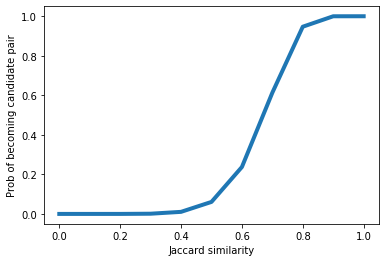

In [19]:
import matplotlib.pyplot as plt
s = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
prob = []
for i in s:
    prob.append(1-(1-i**r)**b)
    
plt.xlabel('Jaccard similarity')
plt.ylabel('Prob of becoming candidate pair')
plt.plot(s, prob, linewidth=4)

In [32]:
def generate_random_vectors(dim, n_vectors):
    """
    generate random projection vectors
    the dims comes first in the matrix's shape,
    so we can use it for matrix multiplication.
    """
    return np.random.randn(dim, n_vectors)